In [2]:
import pandas as pd

# Load the CSV files into pandas DataFrames
df1 = pd.read_csv('/content/loan_sanction_test.csv')
df2 = pd.read_csv('/content/loan_sanction_train.csv')

# Concatenate the DataFrames vertically (stacking one below the other)
combined_df = pd.concat([df1, df2], ignore_index=True)

# Write the combined DataFrame to a new CSV file
combined_df.to_csv('combined_file.csv', index=False)

In [4]:
combined_df = pd.read_csv('/content/combined_file.csv')

In [5]:
combined_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,NaN
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
combined_df.shape

(981, 13)

In [10]:
combined_df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
546,LP001630,Male,No,0,Not Graduate,No,2333,1451.0,102.0,480.0,0.0,Urban,N
151,LP001831,Male,Yes,0,Graduate,No,2783,1456.0,113.0,360.0,1.0,Urban,NaN
855,LP002555,Male,Yes,2,Graduate,Yes,4583,2083.0,160.0,360.0,1.0,Semiurban,Y
292,LP002605,Male,No,0,Not Graduate,No,3271,0.0,90.0,360.0,1.0,Rural,NaN
261,LP002420,Male,Yes,0,Graduate,No,2982,1550.0,110.0,360.0,1.0,Semiurban,NaN


In [11]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [12]:
combined_df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [13]:
combined_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [16]:
combined_df.duplicated().sum()

0

In [21]:
Loan_Amount_Term = combined_df.select_dtypes(include=['int', 'float'])

categorical_features = combined_df.select_dtypes(include=['object'])

In [22]:
Loan_Amount_Term

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5720,0.0,110.0,360.0,1.0
1,3076,1500.0,126.0,360.0,1.0
2,5000,1800.0,208.0,360.0,1.0
3,2340,2546.0,100.0,360.0,NaN
4,3276,0.0,78.0,360.0,1.0
...,...,...,...,...,...
976,2900,0.0,71.0,360.0,1.0
977,4106,0.0,40.0,180.0,1.0
978,8072,240.0,253.0,360.0,1.0
979,7583,0.0,187.0,360.0,1.0


In [23]:
Loan_Amount_Term.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.114247,0.551811,-0.023089,0.023378
CoapplicantIncome,-0.114247,1.000000,0.179228,-0.043860,-0.027253
LoanAmount,0.551811,0.179228,1.000000,0.055636,-0.008235
Loan_Amount_Term,-0.023089,-0.043860,0.055636,1.000000,-0.020439
Credit_History,0.023378,-0.027253,-0.008235,-0.020439,1.000000


In [24]:
correlation_matrix = Loan_Amount_Term.corr()

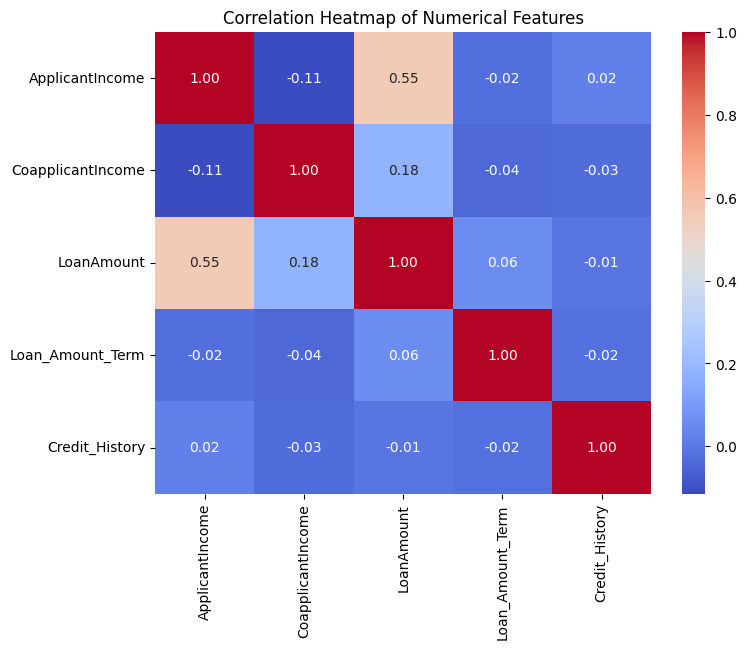

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()